In [1]:
%cd /mnt/disks/extra

/mnt/disks/extra


In [2]:
#!wget https://competitions.codalab.org/my/datasets/download/69a3e8d0-b836-48b8-8795-36a6865a1c04

In [3]:
#!mv 69a3e8d0-b836-48b8-8795-36a6865a1c04 data.zip

In [4]:
#!pip install zipfile36

In [5]:
#!mkdir msaic
#!mv data.zip msaic/

In [6]:
%cd msaic

/mnt/disks/extra/msaic


In [7]:
'''
import zipfile
zipref = zipfile.ZipFile('data.zip', 'r')
zipref.extractall()
zipref.close()
'''

"\nimport zipfile\nzipref = zipfile.ZipFile('data.zip', 'r')\nzipref.extractall()\nzipref.close()\n"

In [8]:
import pandas as pd

In [9]:
#df = pd.read_csv("data.tsv", sep= '\t',header=None)
#df.columns = ['index','Question', 'Sentence', 'Label','seq']

In [10]:
#df.head()

In [11]:
from tqdm import tqdm

In [12]:
'''
row_list = []
for i in tqdm(range(0,len(df)//5, 10), total = len(df)//50, position = 0):
  slice = df.iloc[i:i+10]
  row = []
  row.append(list(slice['index'])[0])
  row.append(list(slice['Question'])[0])
  if len(slice[slice.Label == 1]['seq']) == 0:
    continue
  row.append(list(slice[slice.Label == 1]['seq'])[0])
  row += list(slice['Sentence'])
  row_list.append(row)
  '''

"\nrow_list = []\nfor i in tqdm(range(0,len(df)//5, 10), total = len(df)//50, position = 0):\n  slice = df.iloc[i:i+10]\n  row = []\n  row.append(list(slice['index'])[0])\n  row.append(list(slice['Question'])[0])\n  if len(slice[slice.Label == 1]['seq']) == 0:\n    continue\n  row.append(list(slice[slice.Label == 1]['seq'])[0])\n  row += list(slice['Sentence'])\n  row_list.append(row)\n  "

In [13]:
#rowdf = pd.DataFrame(row_list, columns = ['qid', 'question', 'label', '0','1','2','3','4','5','6','7','8','9'])

In [14]:
#rowdf.head()

In [15]:
#rowdf.to_csv('cleaned_data.tsv', sep = '\t', index = False)

In [16]:
rowdf = pd.read_csv('cleaned_data.tsv', sep = '\t')

In [17]:
rowdf.head()

,qid,question,label,0,1,2,3,4,5,6,7,8,9
0,131,. what is a corporation?,5,A company is incorporated in a specific nation...,"Today, there is a growing community of more th...","Corporation definition, an association of indi...",Examples of corporation in a Sentence. 1 He w...,1: a government-owned corporation (as a utilit...,McDonald's Corporation is one of the most reco...,Corporations are owned by their stockholders (...,An Association is an organized group of people...,B Corp certification shines a light on the com...,LLCs offer greater flexibility when it comes t...
1,226969,symptoms of a dying mouse,5,This can be fatal quite quickly to mice. 1 It...,The symptoms of mites include: 1 excessive sc...,Symptoms of Dog and Cat Poisoning. The symptom...,The symptoms of mites include: excessive scrat...,Seizures and neurologic symptoms are caused by...,The symptoms are similar but the mouse will be...,The symptoms are similar but the mouse will be...,"Depending on the poison ingested, a poisoned d...","Some plants also cause neurologic symptoms, in...",She described symptoms caused by permethrin: d...
2,18122,average number of lightning strikes per day,5,Lightning is a major cause of storm related de...,Quick Answer. Lightning strikes reach the grou...,An average lightning strike discharges about 3...,Lightning fatalities in the U.S.: A map of tot...,Lightning is a sudden high-voltage discharge o...,Although many lightning flashes are simply clo...,"According to the NWS Storm Data, over the last...","Approximately 300,000 lightning strikes hit th...",Florida is also the state with the highest num...,"There is estimated to be around 2,000 lightnin..."
3,35300,can you burn your lawn with fertilizer,8,Verify the reason for the lawn burn. Grass wil...,These spots are generally caused by a buildup ...,Position the sprinkler over the portion of ove...,When fertilizing start with a dry lawn. Using ...,Fertilizing Tips. Watering and mowing alone wi...,A yellow burned lawn is an eye sore that can o...,"Grass1950, the amount of fertilizer you would ...",Rake up the dead grass blades in the fertilize...,Fertilizer burn is the result of over fertiliz...,Preventing Fertilizer Burn. The good news is t...
4,90447,goch meaning,1,"See the Goch surname, family crest & coat of a...",The name Goch is derived from the Welsh word c...,The name Goch is derived from the Welsh word c...,This Slang page is designed to explain what th...,Goch Spelling Variations. Compared to other an...,Link to this slang definition To link to this ...,© 1999-2018 Urban Dictionary ® advertise terms...,The Goch Family Crest was acquired from the Ho...,Link to this slang definition. To link to this...,Link to this slang definition. To link to this...


In [18]:
num_choices = 10

In [19]:
import random

In [20]:
import numpy as np
np.random.seed(200)

In [21]:
msk = np.random.rand(len(rowdf)) < 0.8

In [22]:
len(msk)

96382

In [23]:
tot = rowdf[msk]

In [24]:
def sample_answers(row):
  label = row[0]
  numbers = list(range(0, label)) + list(range(label+1, 10))
  items = random.sample(numbers, num_choices-1)
  items.append(label)
  items.sort()
  label = items.index(label)
  answers = [row[item+1] for item in items]
  return [label]+answers

In [25]:
tot.head()

,qid,question,label,0,1,2,3,4,5,6,7,8,9
1,226969,symptoms of a dying mouse,5,This can be fatal quite quickly to mice. 1 It...,The symptoms of mites include: 1 excessive sc...,Symptoms of Dog and Cat Poisoning. The symptom...,The symptoms of mites include: excessive scrat...,Seizures and neurologic symptoms are caused by...,The symptoms are similar but the mouse will be...,The symptoms are similar but the mouse will be...,"Depending on the poison ingested, a poisoned d...","Some plants also cause neurologic symptoms, in...",She described symptoms caused by permethrin: d...
2,18122,average number of lightning strikes per day,5,Lightning is a major cause of storm related de...,Quick Answer. Lightning strikes reach the grou...,An average lightning strike discharges about 3...,Lightning fatalities in the U.S.: A map of tot...,Lightning is a sudden high-voltage discharge o...,Although many lightning flashes are simply clo...,"According to the NWS Storm Data, over the last...","Approximately 300,000 lightning strikes hit th...",Florida is also the state with the highest num...,"There is estimated to be around 2,000 lightnin..."
3,35300,can you burn your lawn with fertilizer,8,Verify the reason for the lawn burn. Grass wil...,These spots are generally caused by a buildup ...,Position the sprinkler over the portion of ove...,When fertilizing start with a dry lawn. Using ...,Fertilizing Tips. Watering and mowing alone wi...,A yellow burned lawn is an eye sore that can o...,"Grass1950, the amount of fertilizer you would ...",Rake up the dead grass blades in the fertilize...,Fertilizer burn is the result of over fertiliz...,Preventing Fertilizer Burn. The good news is t...
4,90447,goch meaning,1,"See the Goch surname, family crest & coat of a...",The name Goch is derived from the Welsh word c...,The name Goch is derived from the Welsh word c...,This Slang page is designed to explain what th...,Goch Spelling Variations. Compared to other an...,Link to this slang definition To link to this ...,© 1999-2018 Urban Dictionary ® advertise terms...,The Goch Family Crest was acquired from the Ho...,Link to this slang definition. To link to this...,Link to this slang definition. To link to this...
5,226977,symptoms of a gastric ulcer in women,8,Pain from a gastric ulcer may occur shortly af...,Here are ten very evident signs that you may b...,Stomach Ulcers in Women – Gender Specific Diff...,The signs and symptoms of a gastric ulcer are ...,"Peptic ulcers, or peptic ulcer disease (PUD) i...",Because of the risk associated with peptic ulc...,Peptic ulcer disease is characterized by sores...,"Pain from a stomach ulcer can travel, radiatin...",Symptoms Of Stomach Ulcer In Women. stomach ul...,"Besides pain, ulcers in women may sometimes sh..."


In [26]:
if num_choices < 10:
    row_list = []
    for _, row in tot.iterrows():
      nrow = []
      nrow.append(row[0])
      nrow.append(row[1])
      nrow += sample_answers(row[2:])
      row_list.append(nrow)

In [27]:
if num_choices < 10:
    sampled_df = pd.DataFrame(row_list)
else:
    sampled_df = pd.DataFrame(tot)

In [28]:
sampled_df.head()

,qid,question,label,0,1,2,3,4,5,6,7,8,9
1,226969,symptoms of a dying mouse,5,This can be fatal quite quickly to mice. 1 It...,The symptoms of mites include: 1 excessive sc...,Symptoms of Dog and Cat Poisoning. The symptom...,The symptoms of mites include: excessive scrat...,Seizures and neurologic symptoms are caused by...,The symptoms are similar but the mouse will be...,The symptoms are similar but the mouse will be...,"Depending on the poison ingested, a poisoned d...","Some plants also cause neurologic symptoms, in...",She described symptoms caused by permethrin: d...
2,18122,average number of lightning strikes per day,5,Lightning is a major cause of storm related de...,Quick Answer. Lightning strikes reach the grou...,An average lightning strike discharges about 3...,Lightning fatalities in the U.S.: A map of tot...,Lightning is a sudden high-voltage discharge o...,Although many lightning flashes are simply clo...,"According to the NWS Storm Data, over the last...","Approximately 300,000 lightning strikes hit th...",Florida is also the state with the highest num...,"There is estimated to be around 2,000 lightnin..."
3,35300,can you burn your lawn with fertilizer,8,Verify the reason for the lawn burn. Grass wil...,These spots are generally caused by a buildup ...,Position the sprinkler over the portion of ove...,When fertilizing start with a dry lawn. Using ...,Fertilizing Tips. Watering and mowing alone wi...,A yellow burned lawn is an eye sore that can o...,"Grass1950, the amount of fertilizer you would ...",Rake up the dead grass blades in the fertilize...,Fertilizer burn is the result of over fertiliz...,Preventing Fertilizer Burn. The good news is t...
4,90447,goch meaning,1,"See the Goch surname, family crest & coat of a...",The name Goch is derived from the Welsh word c...,The name Goch is derived from the Welsh word c...,This Slang page is designed to explain what th...,Goch Spelling Variations. Compared to other an...,Link to this slang definition To link to this ...,© 1999-2018 Urban Dictionary ® advertise terms...,The Goch Family Crest was acquired from the Ho...,Link to this slang definition. To link to this...,Link to this slang definition. To link to this...
5,226977,symptoms of a gastric ulcer in women,8,Pain from a gastric ulcer may occur shortly af...,Here are ten very evident signs that you may b...,Stomach Ulcers in Women – Gender Specific Diff...,The signs and symptoms of a gastric ulcer are ...,"Peptic ulcers, or peptic ulcer disease (PUD) i...",Because of the risk associated with peptic ulc...,Peptic ulcer disease is characterized by sores...,"Pain from a stomach ulcer can travel, radiatin...",Symptoms Of Stomach Ulcer In Women. stomach ul...,"Besides pain, ulcers in women may sometimes sh..."


In [29]:
len(sampled_df)

76912

In [31]:
train = sampled_df[:5000]
dev = sampled_df[5000:7500]

In [32]:
len(dev)

2500

In [33]:
#!git clone https://github.com/NVIDIA/apex.git

In [35]:
'''
%cd apex/
!python setup.py install --cuda_ext --cpp_ext
%cd ..
'''

'\n%cd apex/\n!python setup.py install --cuda_ext --cpp_ext\n%cd ..\n'

In [36]:
import torch

In [37]:
#!pip install pytorch-pretrained-bert==0.4.0

In [38]:
import csv
import os
import logging
import argparse
import random
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from torch.utils.data.distributed import DistributedSampler

from pytorch_pretrained_bert.tokenization import BertTokenizer
from pytorch_pretrained_bert.modeling import BertModel, PreTrainedBertModel
from pytorch_pretrained_bert.optimization import BertAdam

import os
import copy
import json
import math
import logging
import tarfile
import tempfile
import shutil

from torch import optim
import torch
from torch import nn
from torch.nn import CrossEntropyLoss, L1Loss
from torch.autograd import Variable
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch
loss_fct = nn.CrossEntropyLoss()

In [39]:
%cd ..

/mnt/disks/extra


In [40]:
class BertForSequenceClassification(PreTrainedBertModel):
    def __init__(self, config, num_labels=2):
        super(BertForSequenceClassification, self).__init__(config)
        self.num_labels = num_labels
        self.bert = BertModel(config)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.fc1 = nn.Linear(config.hidden_size, 100)
        self.classifier = nn.Linear(100, num_labels)
        self.apply(self.init_bert_weights)

    def forward(self, input_ids, token_type_ids=None, attention_mask=None, labels=None):
        _, pooled_output = self.bert(input_ids, token_type_ids, attention_mask, output_all_encoded_layers=False)
        pooled_output = self.dropout(pooled_output)
        layer1 = self.dropout(F.relu(self.fc1(pooled_output)))
        logits = self.classifier(layer1)

        if labels is not None:
            loss_fct = CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))
            return loss
        else:
            return logits

In [41]:
import torch
classification_bert = torch.load("bert_large_1to3_79_68_val_acc_1200k_total")

In [42]:
def my_loss2(reshaped_logits, labels,lf):
    crl = reshaped_logits.detach().cpu().numpy()
    cl = labels.detach().cpu().numpy()
    for i in range(len(cl)):
        for j in range(len(crl[i])):
            if crl[i][j] < crl[i][cl[i]]:
                reshaped_logits[i][j] = -200#torch.Tensor(np.inf).cuda().half()
    loss = lf(reshaped_logits,labels)
    return loss

In [43]:
from scipy.stats import rankdata
def calculate_weights(reshaped_logits, labels):
    weights = []
    labels = labels.detach().cpu().numpy()
    reshaped_logits = reshaped_logits.detach().cpu().numpy()
    for i in range(len(labels)):
        weights.append(np.sqrt(num_choices - rankdata(reshaped_logits[i,:], method = 'max')[labels[i]] +1))
    return torch.Tensor(weights)

In [44]:
class UsePretrainedBERTForMultipleChoice(nn.Module):
    def __init__(self, model, num_choices=10):
        super(UsePretrainedBERTForMultipleChoice, self).__init__()
        self.num_choices = num_choices
        self.bert = model
        self.dropout = nn.Dropout(0.1)
        self.size = 1024
        self.fc1 = nn.Linear(self.size*self.num_choices, 200)
        self.fc2 = nn.Linear(200, 100)
        self.classifier = nn.Linear(100, self.num_choices)

    def forward(self, input_ids, token_type_ids=None, attention_mask=None, labels=None):
        flat_input_ids = input_ids.view(-1, input_ids.size(-1))
        flat_token_type_ids = token_type_ids.view(-1, token_type_ids.size(-1))
        flat_attention_mask = attention_mask.view(-1, attention_mask.size(-1))
        _, pooled_output = self.bert(flat_input_ids, flat_token_type_ids, flat_attention_mask, output_all_encoded_layers=False)
        pooled_output = self.dropout(pooled_output)
        pooled_output = pooled_output.view(-1, self.size*self.num_choices)
        layer1 = self.dropout(F.relu(self.fc1(pooled_output)))
        layer2 = self.dropout(F.relu(self.fc2(layer1)))
        logits = self.classifier(layer2)
        reshaped_logits = logits.view(-1, self.num_choices)

        if labels is not None:
            loss_fct = CrossEntropyLoss(reduce = False)
            lf = my_loss2
            weights = calculate_weights(reshaped_logits, labels)
            loss = lf(reshaped_logits, labels,loss_fct)*weights.cuda().half()
            return torch.mean(loss)
        else:
            return reshaped_logits


In [45]:
import torch
#best_bert = torch.load("bert_best_large_trained_with_fc_head_69_val_mrr_200k_total")

In [46]:
def _truncate_seq_pair(tokens_a, tokens_b, max_length):
    """Truncates a sequence pair in place to the maximum length."""

    # This is a simple heuristic which will always truncate the longer sequence
    # one token at a time. This makes more sense than truncating an equal percent
    # of tokens from each, since if one sequence is very short then each token
    # that's truncated likely contains more information than a longer sequence.
    while True:
        total_length = len(tokens_a) + len(tokens_b)
        if total_length <= max_length:
            break
        if len(tokens_a) > len(tokens_b):
            tokens_a.pop()
        else:
            tokens_b.pop()
 
class InputFeatures(object):
    def __init__(self,
                 example_id,
                 choices_features,
                 label

    ):
        self.example_id = example_id
        self.choices_features = [
            {
                'input_ids': input_ids,
                'input_mask': input_mask,
                'segment_ids': segment_ids
            }
              for _, input_ids, input_mask, segment_ids in choices_features
          ]
        self.label = label

def select_field(features, field):
    return [
        [
            choice[field]
            for choice in feature.choices_features
        ]
        for feature in features
    ]


In [47]:
def convert_examples_to_features(df, tokenizer, max_seq_length):
    """Loads a data file into a list of `InputBatch`s."""

    # Swag is a multiple choice task. To perform this task using Bert,
    # we will use the formatting proposed in "Improving Language
    # Understanding by Generative Pre-Training" and suggested by
    # @jacobdevlin-google in this issue
    # https://github.com/google-research/bert/issues/38.
    #
    # Each choice will correspond to a sample on which we run the
    # inference. For a given Swag example, we will create the 4
    # following inputs:
    # - [CLS] context [SEP] choice_1 [SEP]
    # - [CLS] context [SEP] choice_2 [SEP]
    # - [CLS] context [SEP] choice_3 [SEP]
    # - [CLS] context [SEP] choice_4 [SEP]
    # The model will output a single value for each input. To get the
    # final decision of the model, we will run a softmax over these 4
    # outputs.
    features = []
    for example_index, example in df.iterrows():
        context_tokens = tokenizer.tokenize(example[1])
        choices_features = []
        for ending_index, ending in enumerate(example[3:]):
            # We create a copy of the context tokens in order to be
            # able to shrink it according to ending_tokens
            context_tokens_choice = context_tokens[:]
            ending_tokens = tokenizer.tokenize(ending)
            # Modifies `context_tokens_choice` and `ending_tokens` in
            # place so that the total length is less than the
            # specified length.  Account for [CLS], [SEP], [SEP] with
            # "- 3"
            _truncate_seq_pair(context_tokens_choice, ending_tokens, max_seq_length - 3)

            tokens = ["[CLS]"] + context_tokens_choice + ["[SEP]"] + ending_tokens + ["[SEP]"]
            segment_ids = [0] * (len(context_tokens_choice) + 2) + [1] * (len(ending_tokens) + 1)

            input_ids = tokenizer.convert_tokens_to_ids(tokens)
            input_mask = [1] * len(input_ids)

            # Zero-pad up to the sequence length.
            padding = [0] * (max_seq_length - len(input_ids))
            input_ids += padding
            input_mask += padding
            segment_ids += padding

            assert len(input_ids) == max_seq_length
            assert len(input_mask) == max_seq_length
            assert len(segment_ids) == max_seq_length

            choices_features.append((tokens, input_ids, input_mask, segment_ids))

        label = example[2]
        features.append(
            InputFeatures(
                example_id = example[0],
                choices_features = choices_features,
                label = label
            )
        )
    return features


def warmup_linear(x, warmup=0.002):
    if x < warmup:
        return x/warmup
    return 1.0 - x


In [66]:
fp16 = True
local_rank = -1 
gradient_accumulation_steps = 8
train_batch_size = 32
seed = 111
bert_model = 'bert-large-uncased'
do_lower_case = True
warmup_proportion = 0.1
num_choices = num_choices
learning_rate = 2e-5 * gradient_accumulation_steps
loss_scale = 128
num_train_epochs = 5
start_lr = 2e-7
end_lr = 2e-3
use_fp16 = False

In [49]:
#import apex
from pytorch_pretrained_bert.tokenization import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(bert_model)

In [50]:
train_features = convert_examples_to_features(train, tokenizer,80)
dev_features = convert_examples_to_features(dev, tokenizer,80)

In [51]:
all_train_input_ids = torch.tensor(select_field(train_features, 'input_ids'), dtype=torch.long)
all_train_input_mask = torch.tensor(select_field(train_features, 'input_mask'), dtype=torch.long)
all_train_segment_ids = torch.tensor(select_field(train_features, 'segment_ids'), dtype=torch.long)
all_train_label = torch.tensor([f.label for f in train_features], dtype=torch.long)
train_data = TensorDataset(all_train_input_ids, all_train_input_mask, all_train_segment_ids, all_train_label)

In [52]:
all_eval_input_ids = torch.tensor(select_field(dev_features, 'input_ids'), dtype=torch.long)
all_eval_input_mask = torch.tensor(select_field(dev_features, 'input_mask'), dtype=torch.long)
all_eval_segment_ids = torch.tensor(select_field(dev_features, 'segment_ids'), dtype=torch.long)
all_eval_label = torch.tensor([f.label for f in dev_features], dtype=torch.long)
eval_data = TensorDataset(all_eval_input_ids, all_eval_input_mask, all_eval_segment_ids, all_eval_label)

In [53]:
def accuracy(out, labels):
    outputs = np.argmax(out, axis=1)
    return np.sum(outputs == labels)

In [54]:
from scipy.stats import rankdata 
def accuracy(out, labels):
    mrr = 0
    for i in range(len(out)):
        mrr += 1.0/(num_choices - rankdata(out[i], method='max')[labels[i]] +1)
    return mrr

In [55]:
model = UsePretrainedBERTForMultipleChoice(classification_bert.bert)

In [56]:

import numpy as np
from torch.optim import Optimizer


class CyclicLR(object):
    """Sets the learning rate of each parameter group according to
    cyclical learning rate policy (CLR). The policy cycles the learning
    rate between two boundaries with a constant frequency, as detailed in
    the paper `Cyclical Learning Rates for Training Neural Networks`_.
    The distance between the two boundaries can be scaled on a per-iteration
    or per-cycle basis.
    Cyclical learning rate policy changes the learning rate after every batch.
    `batch_step` should be called after a batch has been used for training.
    To resume training, save `last_batch_iteration` and use it to instantiate `CycleLR`.
    This class has three built-in policies, as put forth in the paper:
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each
        cycle iteration.
    This implementation was adapted from the github repo: `bckenstler/CLR`_
    Args:
        optimizer (Optimizer): Wrapped optimizer.
        base_lr (float or list): Initial learning rate which is the
            lower boundary in the cycle for eachparam groups.
            Default: 0.001
        max_lr (float or list): Upper boundaries in the cycle for
            each parameter group. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore
            max_lr may not actually be reached depending on
            scaling function. Default: 0.006
        step_size (int): Number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch. Default: 2000
        mode (str): One of {triangular, triangular2, exp_range}.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
            Default: 'triangular'
        gamma (float): Constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
            Default: 1.0
        scale_fn (function): Custom scaling policy defined by a single
            argument lambda function, where
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored
            Default: None
        scale_mode (str): {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on
            cycle number or cycle iterations (training
            iterations since start of cycle).
            Default: 'cycle'
        last_batch_iteration (int): The index of the last batch. Default: -1
    Example:
        >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
        >>> scheduler = torch.optim.CyclicLR(optimizer)
        >>> data_loader = torch.utils.data.DataLoader(...)
        >>> for epoch in range(10):
        >>>     for batch in data_loader:
        >>>         scheduler.batch_step()
        >>>         train_batch(...)
    .. _Cyclical Learning Rates for Training Neural Networks: https://arxiv.org/abs/1506.01186
    .. _bckenstler/CLR: https://github.com/bckenstler/CLR
    """

    def __init__(self, optimizer, base_lr=1e-3, max_lr=6e-3,
                 step_size=2000, mode='triangular', gamma=1.,
                 scale_fn=None, scale_mode='cycle', last_batch_iteration=-1):

        if not isinstance(optimizer, Optimizer):
            raise TypeError('{} is not an Optimizer'.format(
                type(optimizer).__name__))
        self.optimizer = optimizer

        if isinstance(base_lr, list) or isinstance(base_lr, tuple):
            if len(base_lr) != len(optimizer.param_groups):
                raise ValueError("expected {} base_lr, got {}".format(
                    len(optimizer.param_groups), len(base_lr)))
            self.base_lrs = list(base_lr)
        else:
            self.base_lrs = [base_lr] * len(optimizer.param_groups)

        if isinstance(max_lr, list) or isinstance(max_lr, tuple):
            if len(max_lr) != len(optimizer.param_groups):
                raise ValueError("expected {} max_lr, got {}".format(
                    len(optimizer.param_groups), len(max_lr)))
            self.max_lrs = list(max_lr)
        else:
            self.max_lrs = [max_lr] * len(optimizer.param_groups)

        self.step_size = step_size

        if mode not in ['triangular', 'triangular2', 'exp_range'] \
                and scale_fn is None:
            raise ValueError('mode is invalid and scale_fn is None')

        self.mode = mode
        self.gamma = gamma

        if scale_fn is None:
            if self.mode == 'triangular':
                self.scale_fn = self._triangular_scale_fn
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = self._triangular2_scale_fn
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = self._exp_range_scale_fn
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode

        self.batch_step(last_batch_iteration + 1)
        self.last_batch_iteration = last_batch_iteration

    def batch_step(self, batch_iteration=None):
        if batch_iteration is None:
            batch_iteration = self.last_batch_iteration + 1
        self.last_batch_iteration = batch_iteration
        for param_group, lr in zip(self.optimizer.param_groups, self.get_lr()):
            param_group['lr'] = lr

    def _triangular_scale_fn(self, x):
        return 1.

    def _triangular2_scale_fn(self, x):
        return 1 / (2. ** (x - 1))

    def _exp_range_scale_fn(self, x):
        return self.gamma ** (x)

    def get_lr(self):
        step_size = float(self.step_size)
        cycle = np.floor(1 + self.last_batch_iteration / (2 * step_size))
        x = np.abs(self.last_batch_iteration / step_size - 2 * cycle + 1)

        lrs = []
        param_lrs = zip(self.optimizer.param_groups, self.base_lrs, self.max_lrs)
        for param_group, base_lr, max_lr in param_lrs:
            base_height = (max_lr - base_lr) * np.maximum(0, (1 - x))
            if self.scale_mode == 'cycle':
                lr = base_lr + base_height * self.scale_fn(cycle)
            else:
                lr = base_lr + base_height * self.scale_fn(self.last_batch_iteration)
            lrs.append(lr)
        return lrs

'\ndef find_lr(train_dataloader, model, optim_func=BertAdam, min_lr=0.000001, max_lr=2,\n            device):\n    lr_list = np.linspace(start=min_lr, stop=max_lr, num=len(train_dataloader))\n    loss_list = []\n    curr_loss = 0\n    for step, batch in enumerate(tqdm(train_dataloader, total=len(train_dataloader), desc="Iteration", position=0)):\n        param_optimizer = [(n, param.clone().detach().to(\'cpu\').float().requires_grad_())                            for n, param in model.named_parameters()]\n        no_decay = [\'bias\', \'gamma\', \'beta\']\n        optimizer_grouped_parameters = [\n            {\n                \'params\': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],\n                \'weight_decay_rate\': 0.01},\n            {\'params\': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], \'weight_decay_rate\': 0.0}\n        ]\n        optimizer = optim_func(optimizer_grouped_parameters, lr=lr_list[step])\n        batch = tup

In [56]:
def find_lr(min_lr, max_lr,train_batch_size = train_batch_size ):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    n_gpu = torch.cuda.device_count()

    train_batch_size = int(train_batch_size / gradient_accumulation_steps)

    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if n_gpu > 0:
        torch.cuda.manual_seed_all(seed)

    tokenizer = BertTokenizer.from_pretrained(bert_model, do_lower_case=do_lower_case)

    num_train_steps = int(len(train_data) / train_batch_size / gradient_accumulation_steps * num_train_epochs)

    # Prepare model
    model = UsePretrainedBERTForMultipleChoice(classification_bert.bert)
    if fp16:
        model.half()
    model.to(device)
    if local_rank != -1:
        try:
            from apex.parallel import DistributedDataParallel as DDP
        except ImportError:
            raise ImportError("Please install apex from https://www.github.com/nvidia/apex to use distributed and fp16 training.")

        model = DDP(model)
    elif n_gpu > 1:
        model = torch.nn.DataParallel(model)

    # Prepare optimizer
    param_optimizer = list(model.named_parameters())

    # hack to remove pooler, which is not used
    # thus it produce None grad that break apex
    param_optimizer = [n for n in param_optimizer if 'pooler' not in n[0]]

    no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ]
    global_step = 0
    if local_rank == -1:
        train_sampler = RandomSampler(train_data)
    else:
        train_sampler = DistributedSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=train_batch_size)
    t_total = num_train_steps
    if local_rank != -1:
        t_total = t_total // torch.distributed.get_world_size()
    if fp16:
        try:
            from apex.optimizers import FP16_Optimizer
            from apex.optimizers import FusedAdam
        except ImportError:
            raise ImportError("Please install apex from https://www.github.com/nvidia/apex to use distributed and fp16 training.")

        optimizer = FusedAdam(optimizer_grouped_parameters,
                              lr=learning_rate,
                              bias_correction=False,
                              max_grad_norm=1.0)
        if loss_scale == 0:
            optimizer = FP16_Optimizer(optimizer, dynamic_loss_scale=True)
        else:
            optimizer = FP16_Optimizer(optimizer, static_loss_scale=loss_scale)
    else:
        optimizer = BertAdam(optimizer_grouped_parameters,
                             lr=learning_rate,
                             warmup=warmup_proportion,
                             t_total=t_total)
    lr_list = np.linspace(start=min_lr, stop=max_lr, num=len(train_dataloader)//gradient_accumulation_steps)
    loss_list = []
    curr_loss = 0
    for step, batch in enumerate(tqdm(train_dataloader, total=len(train_dataloader), desc="Iteration", position=0)):
        batch = tuple(t.to(device) for t in batch)
        input_ids, input_mask, segment_ids, label_ids = batch
        loss = model(input_ids, segment_ids, input_mask, label_ids)
        if fp16:
            optimizer.backward(loss)
        else:
            loss.backward()
        if (step + 1) % gradient_accumulation_steps == 0:
            # modify learning rate with special warm up BERT uses
            for param_group in optimizer.param_groups:
                param_group['lr'] = lr_list[global_step]
            curr_loss += loss.item()
            loss_list.append(curr_loss/ (global_step+1))
            optimizer.step()
            optimizer.zero_grad()
            global_step += 1
    plt.plot(lr_list, loss_list)
    plt.show()
    return lr_list[np.argmin(loss_list)]


Iteration:   0%|          | 0/7500 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.7/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
Iteration: 100%|██████████| 7500/7500 [20:15<00:00,  6.20it/s]


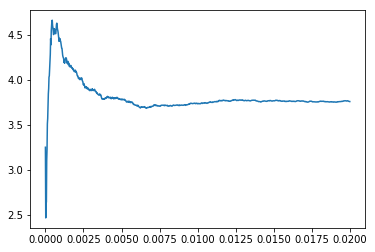

In [57]:
#get_list_out = find_lr(2e-7, 2e-3)

In [73]:
def main(train_batch_size = train_batch_size):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    n_gpu = torch.cuda.device_count()

    train_batch_size = int(train_batch_size / gradient_accumulation_steps)

    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if n_gpu > 0:
        torch.cuda.manual_seed_all(seed)

    tokenizer = BertTokenizer.from_pretrained(bert_model, do_lower_case=do_lower_case)

    num_train_steps = int(len(train_data) / train_batch_size / gradient_accumulation_steps * num_train_epochs)

    # Prepare model
    model = UsePretrainedBERTForMultipleChoice(classification_bert.bert)
    if fp16:
        model.half()
    model.to(device)
    if local_rank != -1:
        try:
            from apex.parallel import DistributedDataParallel as DDP
        except ImportError:
            raise ImportError("Please install apex from https://www.github.com/nvidia/apex to use distributed and fp16 training.")

        model = DDP(model)
    elif n_gpu > 1:
        model = torch.nn.DataParallel(model)

    # Prepare optimizer
    param_optimizer = list(model.named_parameters())

    # hack to remove pooler, which is not used
    # thus it produce None grad that break apex
    param_optimizer = [n for n in param_optimizer if 'pooler' not in n[0]]

    no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ]
    t_total = num_train_steps
    if local_rank != -1:
        t_total = t_total // torch.distributed.get_world_size()
    if fp16 and use_fp16:
        try:
            from apex.optimizers import FP16_Optimizer
            from apex.optimizers import FusedAdam
        except ImportError:
            raise ImportError("Please install apex from https://www.github.com/nvidia/apex to use distributed and fp16 training.")

        optimizer = FusedAdam(optimizer_grouped_parameters,
                              lr=learning_rate,
                              bias_correction=False,
                              max_grad_norm=1.0)
        optimizer = CyclicLR(optimizer,base_lr = start_lr, max_lr = end_lr)
        if loss_scale == 0:
            optimizer = FP16_Optimizer(optimizer, dynamic_loss_scale=True)
        else:
            optimizer = FP16_Optimizer(optimizer, static_loss_scale=loss_scale)
    else:
        optimizer = BertAdam(optimizer_grouped_parameters,
                             lr=learning_rate,
                             warmup=warmup_proportion,
                             t_total=t_total)
    optimizer = CyclicLR(optimizer,base_lr = start_lr, max_lr = end_lr)
    global_step = 0
    if local_rank == -1:
        train_sampler = RandomSampler(train_data)
    else:
        train_sampler = DistributedSampler(train_data)
    train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=train_batch_size)
    eval_sampler = SequentialSampler(eval_data)
    eval_dataloader = DataLoader(eval_data, sampler=eval_sampler, batch_size=train_batch_size)
    for _ in trange(int(num_train_epochs), desc="Epoch", position = 0):
        tr_loss = 0
        nb_tr_examples, nb_tr_steps = 0, 0
        model.train()
        for step, batch in enumerate(tqdm(train_dataloader, desc="Iteration", position = 0)):
            batch = tuple(t.to(device) for t in batch)
            input_ids, input_mask, segment_ids, label_ids = batch
            loss = model(input_ids, segment_ids, input_mask, label_ids)
            if n_gpu > 1:
                loss = loss.mean() # mean() to average on multi-gpu.
            if gradient_accumulation_steps > 1:
                loss = loss / gradient_accumulation_steps
            tr_loss += loss.item()
            nb_tr_examples += input_ids.size(0)
            nb_tr_steps += 1

            if fp16 and use_fp16:
                optimizer.backward(loss)
            else:
                loss.backward()
            if (step + 1) % gradient_accumulation_steps == 0:
                # modify learning rate with special warm up BERT uses
                lr_this_step = learning_rate * warmup_linear(global_step/t_total,warmup_proportion)
                for param_group in optimizer.param_groups:
                    param_group['lr'] = lr_this_step
                optimizer.step()
                optimizer.zero_grad()
                global_step += 1
            
        model.eval()
        eval_loss, eval_accuracy = 0, 0
        nb_eval_steps, nb_eval_examples = 0, 0
        for input_ids, input_mask, segment_ids, label_ids in eval_dataloader:
            input_ids = input_ids.to(device)
            input_mask = input_mask.to(device)
            segment_ids = segment_ids.to(device)
            label_ids = label_ids.to(device)
            with torch.no_grad():
                tmp_eval_loss = model(input_ids, segment_ids, input_mask, label_ids)
                logits = model(input_ids, segment_ids, input_mask)

            logits = logits.detach().cpu().numpy()
            label_ids = label_ids.to('cpu').numpy()
            tmp_eval_accuracy = accuracy(logits, label_ids)

            eval_loss += tmp_eval_loss.mean().item()
            eval_accuracy += tmp_eval_accuracy

            nb_eval_examples += input_ids.size(0)
            nb_eval_steps += 1

        eval_loss = eval_loss / nb_eval_steps
        eval_accuracy = eval_accuracy / nb_eval_examples

        result = {'eval_loss': eval_loss,
                  'eval_mrr': eval_accuracy,
                  'global_step': global_step,
                  'loss': tr_loss/nb_tr_steps}
        print(result)
        torch.save(model, 'checkpoint' + str(eval_accuracy))

In [74]:
main()

Iteration: 100%|██████████| 1250/1250 [03:22<00:00,  6.19it/s]


{'eval_loss': 3.8187203125, 'eval_mrr': 0.31181777777777786, 'global_step': 156, 'loss': 0.48493837890625}


/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:250: UserWarning: Couldn't retrieve source code for container of type UsePretrainedBERTForMultipleChoice. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
Iteration: 100%|██████████| 1250/1250 [03:22<00:00,  6.19it/s]


{'eval_loss': 3.8187203125, 'eval_mrr': 0.31181777777777786, 'global_step': 312, 'loss': 0.47849423828125}


Iteration: 100%|██████████| 1250/1250 [03:22<00:00,  6.17it/s]


{'eval_loss': 3.8187203125, 'eval_mrr': 0.31181777777777786, 'global_step': 468, 'loss': 0.482462841796875}


Iteration: 100%|██████████| 1250/1250 [03:22<00:00,  6.18it/s]


KeyboardInterrupt: 

In [58]:
#model = best_bert

In [59]:
%cd msaic

/mnt/disks/extra/msaic


In [60]:
import pandas as pd
df2 = pd.read_csv("eval1_unlabelled.tsv", sep= '\t',header=None)
df3 = df2.copy()
df3.columns = ['index','Question', 'Sentence','seq']
df3.head()

,index,Question,Sentence,seq
0,1135787,distance between erie in buffalo new york,Erie Canal Distance Tables The Erie Canal is t...,0
1,1135787,distance between erie in buffalo new york,What is the distance between Erie AND Buffalo?...,1
2,1135787,distance between erie in buffalo new york,The distance between Erie and Buffalo in a str...,2
3,1135787,distance between erie in buffalo new york,Erie Canal Distances. Erie Canal Distance Tabl...,3
4,1135787,distance between erie in buffalo new york,Erie's Metropolitan Area consists of approxima...,4


In [61]:
from tqdm import tqdm
row_list = []
for i in tqdm(range(0,len(df3), 10), total = len(df3)//10, position = 0):
  slice = df3.iloc[i:i+10]
  row = []
  row.append(list(slice['index'])[0])
  row.append(list(slice['Question'])[0])
  row.append(0)
  row += list(slice['Sentence'])
  row_list.append(row)

100%|██████████| 10417/10417 [00:02<00:00, 3767.85it/s]


In [62]:
testdf = pd.DataFrame(row_list, columns = ['qid', 'question', 'label', '0','1','2','3','4','5','6','7','8','9'])

In [63]:
#testdf.head()

In [64]:
test_features = convert_examples_to_features(testdf, tokenizer,80)

In [66]:
all_eval_input_ids = torch.tensor(select_field(test_features, 'input_ids'), dtype=torch.long)
all_eval_input_mask = torch.tensor(select_field(test_features, 'input_mask'), dtype=torch.long)
all_eval_segment_ids = torch.tensor(select_field(test_features, 'segment_ids'), dtype=torch.long)
#all_eval_label = torch.tensor([f.label for f in test_features], dtype=torch.long)
test_data = TensorDataset(all_eval_input_ids, all_eval_input_mask, all_eval_segment_ids)#, all_eval_label)

In [68]:
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=train_batch_size)

In [71]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [72]:
model.eval()
outputs_list = []
for input_ids, input_mask, segment_ids in tqdm(test_dataloader, total = len(test_dataloader), position = 0):
    input_ids = input_ids.to(device)
    input_mask = input_mask.to(device)
    segment_ids = segment_ids.to(device)
    with torch.no_grad():
        logits = model(input_ids, segment_ids, input_mask)
        logits = logits.detach().cpu().numpy()
        outputs_list.append(logits)

In [74]:
outputs =[]
for item in outputs_list:
  for i in item:
    outputs.append(i)

In [75]:
outs = []
for item in outputs:
  for i in item:
    outs.append(i)

In [78]:
df3['pred'] = outs

In [79]:
df3.head(10)

,index,Question,Sentence,seq,pred
0,1135787,distance between erie in buffalo new york,Erie Canal Distance Tables The Erie Canal is t...,0,0.811035
1,1135787,distance between erie in buffalo new york,What is the distance between Erie AND Buffalo?...,1,3.162109
2,1135787,distance between erie in buffalo new york,The distance between Erie and Buffalo in a str...,2,2.925781
3,1135787,distance between erie in buffalo new york,Erie Canal Distances. Erie Canal Distance Tabl...,3,-0.003242
4,1135787,distance between erie in buffalo new york,Erie's Metropolitan Area consists of approxima...,4,-1.584961
5,1135787,distance between erie in buffalo new york,This will help you estimate how much time you ...,5,-2.371094
6,1135787,distance between erie in buffalo new york,"As a general guide, Albany to Oswego, NY will ...",6,-2.101562
7,1135787,distance between erie in buffalo new york,"Erie, PA. {{::location.tagLine.value.text}}. C...",7,-0.597656
8,1135787,distance between erie in buffalo new york,"You start your flight Distance from Buffalo, N...",8,-2.619141
9,1135787,distance between erie in buffalo new york,What is the distance between Erie AND Buffalo?...,9,3.078125


In [83]:
outfilename = 'answer.tsv'
with open(outfilename,"w",encoding="utf-8") as fw:
  import math
  linelist = []
  tempscores = []
  for idx, row in df3.iterrows():
      tempscores.append(math.exp(row['pred']))
      if((idx +1)%10==0):
          expsum = sum(tempscores)
          tempscores = [str(s/expsum) for s in tempscores]
          scoreString = "\t".join(tempscores)
          qid = str(row[0])
          fw.write(qid+"\t"+scoreString+"\n")
          tempscores=[]
      if(idx%5000==0):
          print(idx)


0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000


In [84]:
df6 = pd.read_csv('answer.tsv', sep = '\t')
df6.head()

,1135787,0.032957278743477876,0.345947267712741,0.2731328298244241,0.014598729294635408,0.0030018118173541566,0.001367635358668276,0.0017907141074189321,0.008056834464135701,0.0010671978248448933,0.31807970085229975
0,281922,0.410156,0.015919,0.316326,0.018341,0.010491,0.117972,0.048867,0.031981,0.009044,0.020905
1,120233,0.027486,0.017434,0.015731,0.014556,0.018980,0.467200,0.003280,0.376139,0.044814,0.014379
2,319757,0.020785,0.099061,0.023783,0.048930,0.093196,0.021867,0.017383,0.012994,0.128571,0.533431
3,193633,0.010344,0.281637,0.015389,0.012338,0.009322,0.006827,0.006180,0.621188,0.029655,0.007120
4,50229,0.164240,0.006654,0.008129,0.647051,0.031696,0.010087,0.047010,0.066359,0.005474,0.013299


In [85]:
%cp answer.tsv /home/jupyter/